<a href="https://colab.research.google.com/github/sonalimp29/UMAP-/blob/main/Plotting_UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn.datasets
import pandas as pd
import numpy as np
import umap

In [ ]:
pendigits = sklearn.datasets.load_digits()
mnist = sklearn.datasets.fetch_openml('mnist_784')
fmnist = sklearn.datasets.fetch_openml('Fashion-MNIST')

In [ ]:
mapper = umap.UMAP().fit(pendigits.data)

In [ ]:
pip install umap-learn[plot]

     |████████████████████████████████| 15.8MB 311kB/s 
     |████████████████████████████████| 1.6MB 54.6MB/s 
     |████████████████████████████████| 81kB 11.1MB/s 
     |████████████████████████████████| 675kB 45.3MB/s 
     |████████████████████████████████| 112kB 50.5MB/s 
  Created wheel for datashape: filename=datashape-0.5.2-cp37-none-any.whl size=59430 sha256=2199174089097c2c6cfb382ea0e6fe7bb89ec5c174220e369bb4b348e96628d4
  Stored in directory: /root/.cache/pip/wheels/8d/06/05/c1cba3d57bdcfd3960e3f60a9fdc97e4baef2ef09af0ad1ef8
Successfully built datashape
ERROR: distributed 2021.3.0 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.
ERROR: distributed 2021.3.0 has requirement dask>=2021.03.0, but you'll have dask 2.12.0 which is incompatible.
  Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3


In [ ]:
import umap.plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


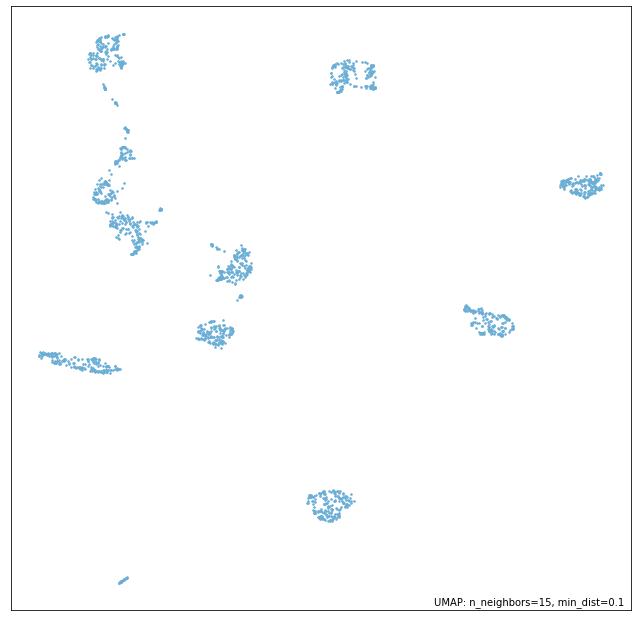

In [ ]:
umap.plot.points(mapper)

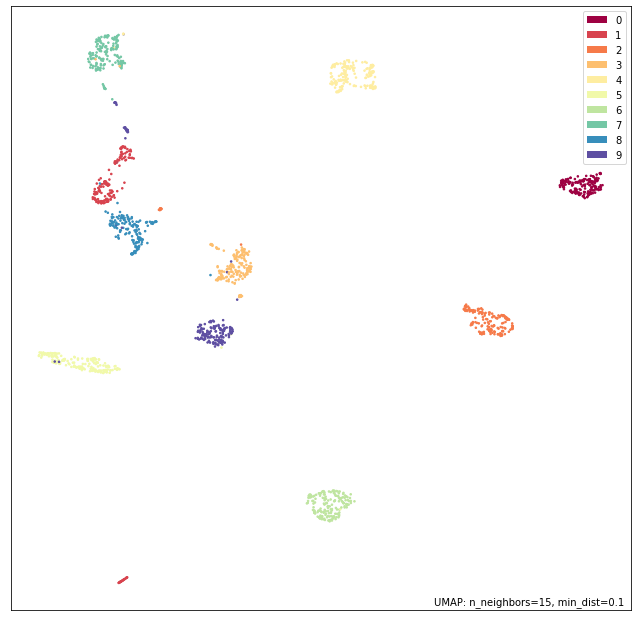

In [ ]:
umap.plot.points(mapper, labels=pendigits.target)

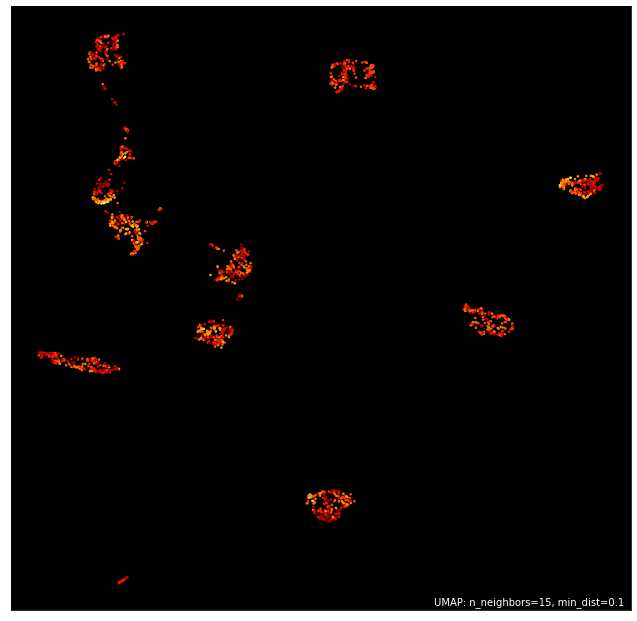

In [ ]:
umap.plot.points(mapper, values=pendigits.data.mean(axis=1), theme='fire')

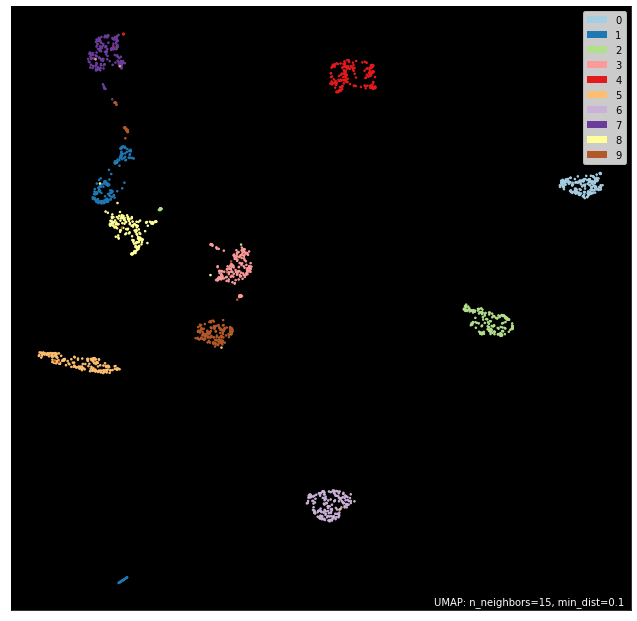

In [ ]:
umap.plot.points(mapper, labels=pendigits.target, color_key_cmap='Paired', background='black')

In [ ]:
##Plotting Larger Data
mapper = umap.UMAP().fit(fmnist.data)

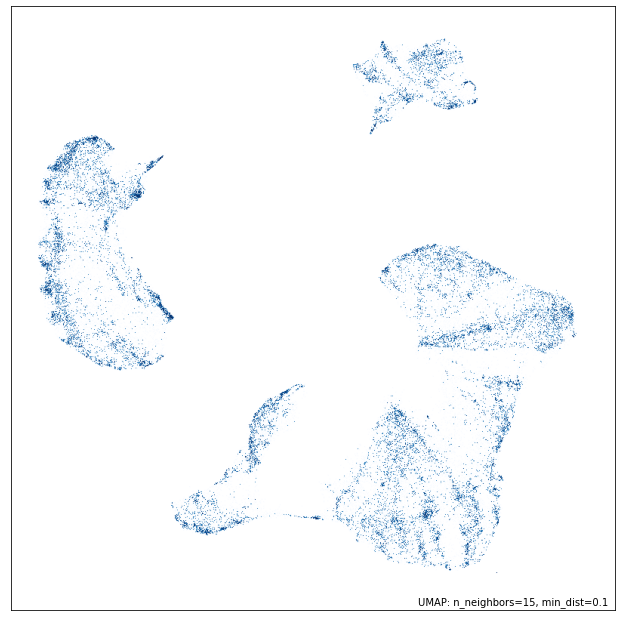

In [ ]:
umap.plot.points(mapper)

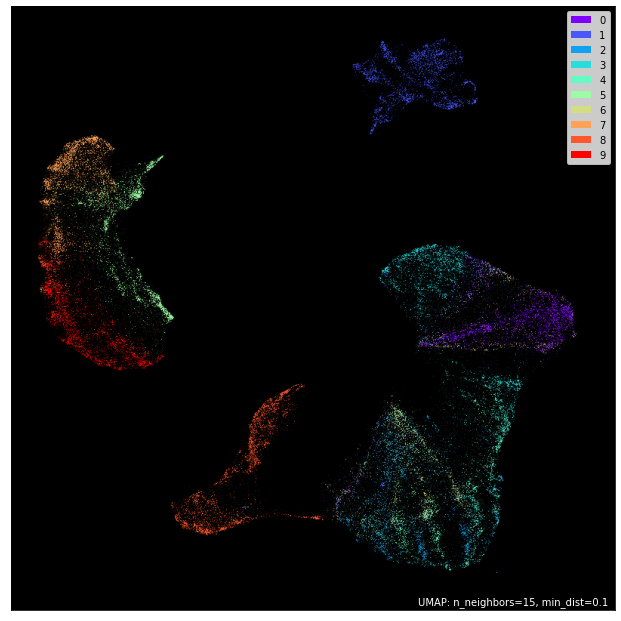

In [ ]:
umap.plot.points(mapper, labels=fmnist.target, theme='fire')

In [ ]:
##Interactive plotting, and hover tools
mapper = umap.UMAP().fit(fmnist.data[:30000])


In [ ]:
hover_data = pd.DataFrame({'index':np.arange(30000),
                           'label':fmnist.target[:30000]})
hover_data['item'] = hover_data.label.map(
    {
        '0':'T-shirt/top',
        '1':'Trouser',
        '2':'Pullover',
        '3':'Dress',
        '4':'Coat',
        '5':'Sandal',
        '6':'Shirt',
        '7':'Sneaker',
        '8':'Bag',
        '9':'Ankle Boot',
    }
)

In [ ]:
umap.plot.output_notebook()


In [ ]:
p = umap.plot.interactive(mapper, labels=fmnist.target[:30000], hover_data=hover_data, point_size=2)
umap.plot.show(p)

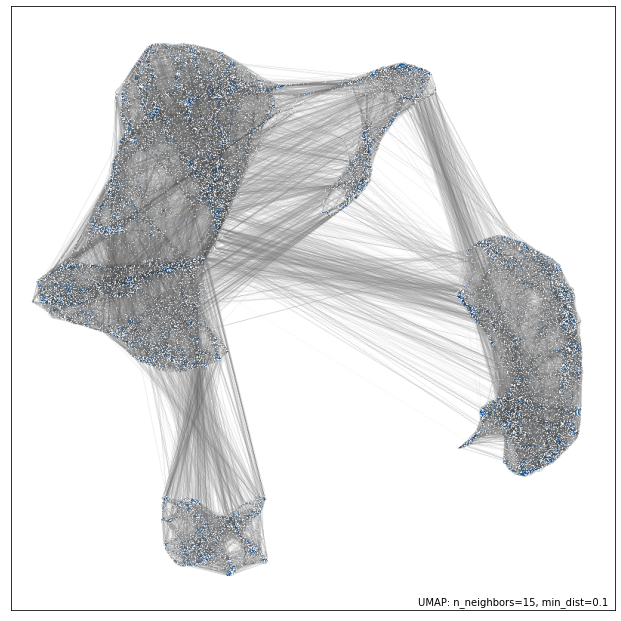

In [ ]:
##Plotting Connectivity
umap.plot.connectivity(mapper, show_points=True)

/usr/local/lib/python3.7/dist-packages/umap/plot.py:855: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  "Hammer edge bundling is expensive for large graphs!\n"


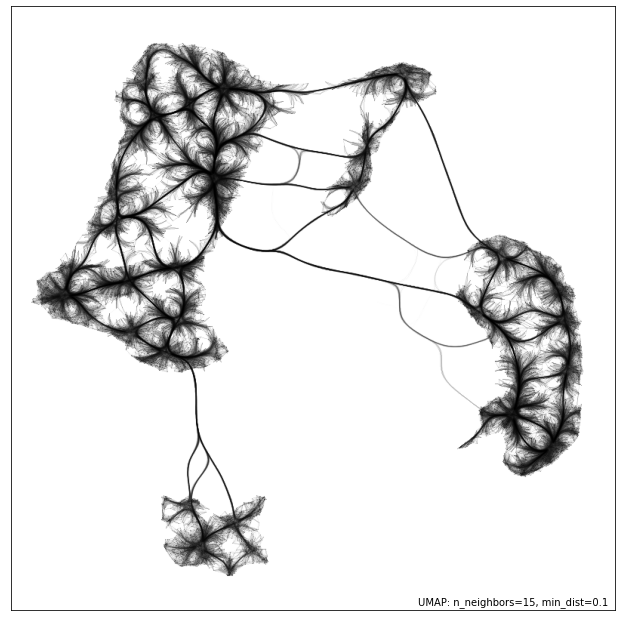

In [ ]:
umap.plot.connectivity(mapper, edge_bundling='hammer')

In [ ]:
##Diagnostic Plotting
mapper = umap.UMAP().fit(mnist.data)

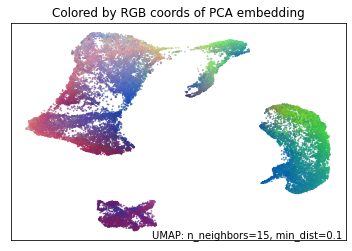

In [ ]:
umap.plot.diagnostic(mapper, diagnostic_type='pca')


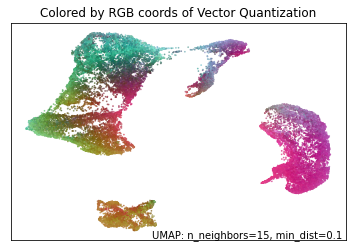

In [ ]:
umap.plot.diagnostic(mapper, diagnostic_type='vq')


In [ ]:

local_dims = umap.plot.diagnostic(mapper, diagnostic_type='local_dim')


/usr/local/lib/python3.7/dist-packages/umap/plot.py:202: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "_nhood_compare" failed type inference due to: Use of unsupported NumPy function 'numpy.intersect1d' or unsupported use of the function.

File "../usr/local/lib/python3.7/dist-packages/umap/plot.py", line 208:
def _nhood_compare(indices_left, indices_right):
    <source elided>
    for i in range(indices_left.shape[0]):
        intersection_size = np.intersect1d(indices_left[i], indices_right[i]).shape[0]
        ^

During: typing of get attribute at /usr/local/lib/python3.7/dist-packages/umap/plot.py (208)

File "../usr/local/lib/python3.7/dist-packages/umap/plot.py", line 208:
def _nhood_compare(indices_left, indices_right):
    <source elided>
    for i in range(indices_left.shape[0]):
        intersection_size = np.intersect1d(indices_left[i], indices_right[i]).shape[0]
        ^

  @numba.jit()
/usr/local/lib/python3.7/dist-pa

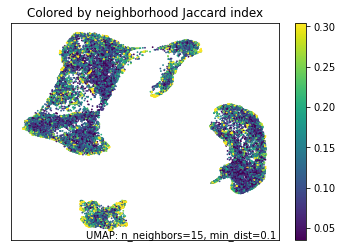

In [ ]:
umap.plot.diagnostic(mapper, diagnostic_type='neighborhood')
